# TP2 : Interpolation polynomiale et approximation

# Partie I. Interpolation polynomiale
## Objectif
 
L'objectif de cette partie du TP est :
  
- d'interpoler un nombre de points donné par un polynôme en utilisant la méthode d'interpolation de  ***Lagrange***.
 
- Représenter le polynôme d'interpolation de  ***Lagrange***.
- Interpréter graphiquement les résultats obtenus.

## Prérequis :

- Ecrire un polynôme dans la base canonique $\{1,X,X^2,\cdots,X^n\}$ de $\mathbb R_n[X]$.
- Ecrire un polynôme dans la base de **Lagrange**
- Somme et produit de deux polynômes.
- Evaluation d'un polynôme en un point.
-  Représentation graphique d'un polynôme.

## Bibliothèques :
Les bibliothèques utilisées dans ce notebook sont :

In [62]:
import numpy as np
import matplotlib.pyplot as plt

Les polynômes dans NumPy peuvent être créés, manipulés et même ajustés à l'aide de la classe `Polynomial` du package `numpy.polynomial`. Pour déclarer cette classe, on écrit :

In [63]:
from numpy.polynomial import Polynomial

# I. Introduction :
Un polynôme $P_n\in \mathbb R_n[X]$ à une indéterminée $X$ s'écrit sous la forme :
$$P _n(X)=\alpha_0+\alpha_1 X+\alpha_2X^2+\cdots \alpha_nX^n=\sum_{i=0}^n\alpha_iX^i,$$
avec $\alpha_i\in \mathbb R$.

Le polynôme $P_n$ est donné dans la base canonique $\{1,X,X^2,\cdots,X^n\}$ de l'espace vectoriel $\mathbb R_n[X]$. $\mathbb R_n[X]$ est l'ensemble  des polynômes de degré inférieur ou égal à $n$.

Le polynôme $P_n$ est caractérisé par ses coefficients $\alpha_0$, $\alpha_1$,...,$\alpha_n$.

Pour déclarer le polynôme $P_n$,  On utilise la classe `Polynomial` comme suit :
$$P_n=\text{Polynomial}([\alpha_0,\alpha_1,...,\alpha_n])$$
Il faut écrire les coefficients par ordre de degré croissant.

## Exercice :
**Soient $P$ et $Q$ deux polynomes donnés par :**
$$P(X)=1+6X^2+X^3,\qquad Q(X)=2+5X^2$$
1. **Ecrire les polynômes $P$ et $Q$, puis afficher leurs types**
1. **Donner l'expression des polynomes $P+Q$ et PQ, puis utiliser la commande `coef`pour afficher leurs coefficients**


In [64]:
# Question 1  
P=Polynomial([1,0,6,1]) #P(X)=1+6*X^2+1*X^3=1+0*X+6*X^2+1*X^3.
Q=Polynomial([2,0,5]) #Q(X)=2+5*X^2=2+0*X+5*X^2.
type(P), type(Q)

(numpy.polynomial.polynomial.Polynomial,
 numpy.polynomial.polynomial.Polynomial)

In [65]:
# Question 2:  
R=P+Q
R
#print('P+Q=',R)
#print('P*Q=',P*Q)

Polynomial([ 3.,  0., 11.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [66]:
# Les coefficients de P+Q
R.coef
#print((P*Q).coef)

array([ 3.,  0., 11.,  1.])

### ``` Attention```
Pour extraire le coefficient $a_i$ du polynome $R$, on utilise l'instruction ``` R.coef[i]``` et non ```R(i)```. 
- ``` R.coef``` affiche tous les coefficient de $R$.
-  ``` R.coef[i]``` affiche le coefficient $a_i$ de $R$.
- ``` R(i)``` evalue $R$ en $i$ (affiche la valeur de $R$ en $i$).

# II. Interpolation de Lagrange :
## Rappel : (Interpolation polynomiale)
Soient $n+1$ points $(x_i, y_i)_{0\leq i\leq n}$. Interpoler ces points correspond à déterminer le polynôme $P\in\mathbb{R}_n[X]$ passant par ces derniers : $$\forall i\in\{0,\cdots,n\}, \quad P(x_i)=y_i.$$
Les abscisses $(x_i)_{0\leq i\leq n}$ et les ordonnées $(y_i)_{0\leq i\leq n}$  sont appelées, respectivement, les points et les valeurs d’interpolation. Pour interpoler une fonction $f$, on définit ses valeurs d’interpolation comme suit : $$ y_i = f(x_i),\;\forall\;0\leq i\leq n.$$ 
Dans ce qui suit, nous présentons la méthode d'interpolation de  Lagrange.

##  <font color='red'>Codage : $l_{ij}$</font> 
**Ecrire une fonction `coefficients(x,i,j)` prenant en entrée $x=(x_i)_{0\leq i\leq n}$, des abscisses des points, $i$ et $j$, des indices différents, et retourne les coefficients du polynôme $l_{ij}(t)$ :**

$$\begin{cases}
l_{ij}(t)=1,& i=j\\
\\
{l_{ij}}(t)=\dfrac{t-x_j}{x_i-x_j}=\underbrace{\dfrac{-x_j}{x_i-x_j}}_{a_0}+\underbrace{\dfrac{t}{x_i-x_j}}_{a_1t},& i\neq j,
\end{cases}
 \ \ \ avec \ i,j\in\{0,\cdots,n\}.
$$
Pour définir $ l_ {ij} (t) $, il suffit d'utiliser la commande `Polynomial([a0,a1])`.

In [67]:
def coefficients(x,i,j):
    pol=Polynomial([1]) 
    if i!=j:  #tester si i est différent de j
        pol=Polynomial([ -x[j]/(x[i]-x[j]) , 1/(x[i]-x[j]) ]) # Ecrire les coeff de l_ij
    return pol 

**Application :** Pour $x=(-2,-1,0,1)$, calculer $l_{01}$.

In [68]:
x=[-2,-1,0,1]
coefficients(x,0,1)
#print('l01=',coefficients(x,0,1))
#coefficients(x,0,1).coef

Polynomial([-1., -1.], domain=[-1,  1], window=[-1,  1])

##  <font color='red'>Codage : $L_{i}$</font>  
**Ecrire une fonction `Lagrange(x,i)` prenant en entrée $x=(x_i)_{0\leq i\leq n}$, des abscisses des points, $i$ un indice tel que $0\leq i\leq n$, et retourne les coefficients du polynôme $\displaystyle L_i(t)=\underset{j\neq i}{\prod_{j=0}^{n}}   l_{ij}(t)$.**

In [69]:
def Lagrange(x,i): # les coefficients de polynome de Lagrange (Li)
    L=Polynomial([1]) # Initialisation de L
    for j in range(len(x)): # par construction de J, i différent de j
        if j!=i:
            Lij=coefficients(x,i,j) # Appeler la fonction coefficients(x,i,j) pour calculer lij.
            L*=Lij # Faire le produit 
    return L

**Application :** Soit $x=(-2,-1,0,1)$, calculer $L_0$, $L_1$, $L_2$ et $L_3$.

In [70]:
x=[-2,-1,0,1]
print('L0=',Lagrange(x,0))
print('L1=',Lagrange(x,1))
print('L2=',Lagrange(x,2))
print('L3=',Lagrange(x,3))

L0= poly([ 0.          0.16666667  0.         -0.16666667])
L1= poly([ 0.  -1.   0.5  0.5])
L2= poly([ 1.   0.5 -1.  -0.5])
L3= poly([0.         0.33333333 0.5        0.16666667])


## <font color='red'>Codage de $P(x)=\displaystyle\sum_{i=0}^{n}y_iL_i(x)$</font> 
**Ecrire une fonction `polynome_Lagrange(x,y)` prenant en entrée $x=(x_i)_{0\leq i\leq n}$ et $y=(y_i)_{0\leq i\leq n}$, les abscisses et les ordonnées des points $(x_i,y_i)$  tel que $0\leq i\leq n$  et retourne le polynôme $\displaystyle P(t)=\sum_{i=0}^{n}y_iL_i(t)$**

In [71]:
def polynome_Lagrange(x,y): # les coefficients de polynome de Lagrange Pn= \sum y_i*L_i
    P=Polynomial([0])  # Initialisation de P par un polynome nul
    n=len(x) # donner la taille de x ou y
    for i in np.arange(n): # pour i on [0,n-1]
        produit=y[i]*Lagrange(x,i)  # Utiliser la fonction Li(x,i) et l'ordonné y[i] pour calculer y_i*L_i
        P+=produit # donner le polynome
    return P

## <font color='red'>Evaluation d'un polynôme en un point et sa répresentation graphique</font> 

***Exercice:***

1. Interpoler, par la méthode de Lagrange, la fonction  $\cos$ aux points d'interpolation : $\{-\pi,-\frac{\pi}{2},0,\frac{\pi}{2},\pi\}$.  
2. Sur $[-\frac{3\pi}{2},\frac{3\pi}{2}]$, tracer sur un même graphe les courbes de la fonction $\cos$ et $P$, son polynôme d'interpolation de Lagrange associé aux points $\{-\pi,-\frac{\pi}{2},0,\frac{\pi}{2},\pi\}$.
3. Interpréter les résultats.

In [72]:
#Question 1:  
x=[-np.pi,-(0.5)*np.pi,0,(0.5)*np.pi,np.pi] # ou bien x=np.linspace(-np.pi,np.pi,5)
y=np.cos(x)
P4=polynome_Lagrange(x,y)
print("P=",P4)
P4

P= poly([ 1.00000000e+00 -5.55111512e-17 -4.72832190e-01  0.00000000e+00
  2.73759527e-02])


Polynomial([ 1.00000000e+00, -5.55111512e-17, -4.72832190e-01,  0.00000000e+00,
        2.73759527e-02], domain=[-1.,  1.], window=[-1.,  1.])

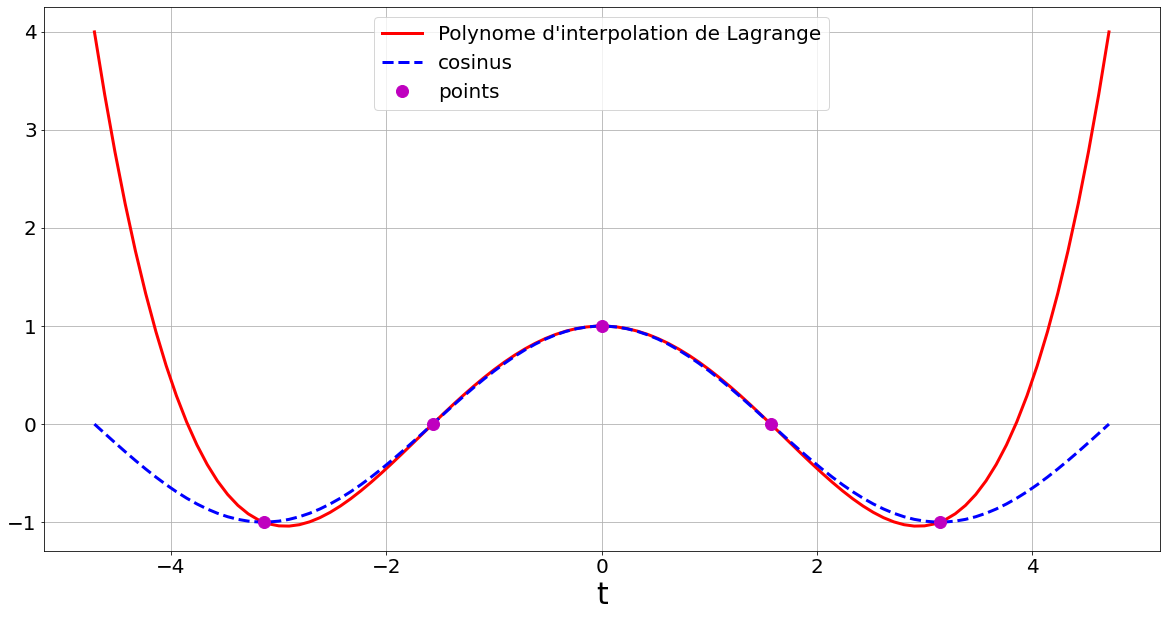

In [73]:
# Question 2  
t=np.linspace(-1.5*np.pi,1.5*np.pi,100)
plt.figure(figsize=(20,10))
plt.plot(t,P4(t),'r-',t,np.cos(t), 'b--',x,np.cos(x),'mo',linewidth=3,markersize=12)
plt.xlabel('t',fontsize=30)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.grid(True)
plt.legend(('Polynome d\'interpolation de Lagrange', 'cosinus', 'points'),fontsize=20, loc = 0)

 # Partie II.  Approximation polynomiale

## Objectif   
L'objectif de cette partie est de :  
- Observer les données à modéliser,
- Choisir le modèle adéquat, ajustant ces données,
- Estimer les paramètres du modèle choisi au sens des moindres carrées.

## Rappel du cours 
### Ajustement de données
On considère $(n+1)$ points,  $\displaystyle (x_i,y_i)_{0\leq i \leq n}$, d'abscisses deux à deux distinctes.   
On note par $X=(x_i)_{0\leq i \leq n}\in\mathcal{M}_{(n+1),1}(\mathbb{R})$ et $Y=(y_i)_{0\leq i \leq n}\in\mathcal{M}_{(n+1),1}(\mathbb{R})$.  
- La problématique consiste à juster un modèle défini par une fonction $f(.;\Lambda)$ paramétrée par $\Lambda=(\lambda_j)_{0\leq j\leq p}\in\mathcal{M}_{(p+1),1}(\mathbb{R})$ aux  données $(x_i,y_i)_{0\leq i \leq n}$   : approcher  $f(x_i;\Lambda)$ par $y_i$, $\forall i \in \{0,\cdots,n\}$.  
- La fonction $f : \mathbb{R}^{n+1}\rightarrow
\mathbb{R}^{n+1}$ pourrait être linéaire ou  non-linéaire.
- Le choix du modèle dépendra du phénomène étudié.  
- Nous nous focalisons dans ce TP sur les fonctions polynomiales : $$ f(t;\Lambda)=\sum_{j=0}^p \lambda_jt^j,\;t\in\mathbb{R}.$$  
- Deux cas possibles qui se présentent :
    - $p=n$ : il s'agit alors d'une interpolation polynomiale
    - $p<n$ : il s'agit d'une approximation polynomiale  
    
### Détermination du vecteur $\Lambda$ au sens des moindres carrées
Le vecteur $\Lambda^*$, optimal au sens des moindres carrées, pour lequel on a un meilleur ajustement du modèle polynomiale $ f(t;\Lambda)=\displaystyle \sum_{j=0}^p \lambda_jt^j,\;t\in\mathbb{R},$ aux données $\displaystyle (x_i,y_i)_{0\leq i \leq n}$, est celui minimisant la fonctionnelle $$F(\Lambda;X)=\sum_{i=0}^n (f(x_i;\Lambda)-y_i)^2.$$  Celà revient à dire que : $$\Lambda^*=\underset{\Lambda\in\mathbb{R}^{p+1}}{\; argmin\; } F(\Lambda;X).$$



En effet,  on note l'erreur résiduelle $e_i=f(x_i;\Lambda)-y_i$, $\forall i\in\{0,\cdots,n\}$, l'erreur commise par le modèle, $F(\Lambda;X)$ sera ainsi exprimée comme suit :  
$$F(\Lambda;X)=\sum_{i=0}^n \big(f(x_i;\Lambda)-y_i\big)^2= \sum_{i=0}^n e_i^2= \parallel \varepsilon \parallel_2^{^2}$$
avec  $\varepsilon=(e_i)_{0\leq j\leq n}$, et $\parallel . \parallel_2$ désigne la norme euclidienne.

En développant l'expression de l'erreur  $\displaystyle e_i=\sum_{j=0}^p \lambda_jx_i^j-y_i$, $\forall i\in\{0,\cdots,n\}$, : un système de $n+1$ équations linéaires sera généré selon la forme matricielle suivante :

 $$\underset{\varepsilon}{\underbrace{\begin{pmatrix}
  e_0 \\
\vdots \\
e_i \\
\vdots \\
e_n \\
\end{pmatrix}}}=\underset{A}{\underbrace{\begin{pmatrix}
                                                                                                                                1& x_0 & x_0^2 & \cdots & x_0^p \\
                                                                                                                                \vdots & & &  & \vdots \\                                                                                                                                1& x_i & x_i^2 & \cdots & x_i^p \\                                                                                                                                \vdots &  & & & \vdots \\
1& x_n & x_n^2 & \cdots & x_n^p \\                                                                                                                     
                                                                                                                              \end{pmatrix}}}\underset{\Lambda}{\underbrace{\begin{pmatrix}
                                                                               \lambda_0 \\
                                                                               \vdots \\
                                                                               \lambda_2 \\
                                                                               \vdots \\
                                                                               \lambda_p \\
                                                                             \end{pmatrix}}}-\underset{Y}{\underbrace{\begin{pmatrix}
                                                                               y_0 \\
                                                                               \vdots \\
                                                                               y_i \\
                                                                               \vdots \\
                                                                               y_n \\
                                                                             \end{pmatrix}}}$$  
                                                                             
$\Rightarrow $ $F(\Lambda;X)=\parallel \varepsilon\parallel_2^{^2}=\parallel A\Lambda-Y\parallel_2^{^2}$.  

La vecteur $\Lambda^*$ minimisant $F(\Lambda;X)$ satisfait la condition suivante :
$$\bigtriangledown F(\Lambda^*;X)=0_{p+1} : \quad \frac{\partial F(\Lambda^*;X)}{\partial \lambda_i}=0, \; 0\leq i\leq p.$$
où $0_{p+1}$ désigne le vecteur nul de $\mathbb{R}^{p+1}$, $\bigtriangledown F(\Lambda^*;X)$ correspond au gradient de $F(.;X)$ appliqué à  $\Lambda^*$ et $\displaystyle \frac{\partial F(\Lambda^*;X)}{\partial \lambda_i}$ présente la dérivée partielle de $F(.,X)$ par rapport à $\lambda_i$, appliquée à $\Lambda^*$.  

En développant l'expression des dérivées partielles, il s'en suit : 


$$\bigtriangledown F(\Lambda^*;X)=0_{p+1} \; \Rightarrow \; 2\; ^tA(A\Lambda^*-Y)=0_{p+1}$$
$$\Rightarrow \Lambda^*=(^tAA)^{-1}\quad ^tAY$$



# Implémentation
Ecrire une fonction, que nous appelons `PLSA` 'Polynomial Least Squares Approximation' qui, pour un jeux de données (X,Y) et un ordre de modèle polynomiale $p$, retourne le vecteur  $\Lambda^*$ de coefficients estimés du modèle sous-jacent, au sens des moindres carrées.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [75]:
def PLSA(X,Y,p): # X et Y deux tableaux 1D
    n = len(X)
    A = np.ones((n,p+1))
    for i in np.arange(1,p+1):
        A[:,i] = X[:,0]**i    
    Lambda=np.linalg.inv(A.T.dot(A)).dot(A.T.dot(Y))[:,0]
    return  Polynomial(Lambda)  

Exercice
--------  

1. Déterminer l'expression de la droite optimale, au sens des moindres carrées, qui ajuste les points suivants :    
  
|$i$ | 0 | 1 | 2 | 3 | 4 |  
|:---|:--|:--|:--|:--|:--|
|$x_i$|1|2|3|4|5|
|$y_i$|0.9|1.5|3.5|4.2|4.9|

2. Représenter ensuite graphiquement le résultat de l'ajustement.

In [76]:
X = np.array([[1,2,3,4,5]]).T
Y = np.array([[0.9,1.5,3.5,4.2,4.9]]).T
Lambda = PLSA(X,Y,1)
print(Lambda)

poly([-0.21  1.07])


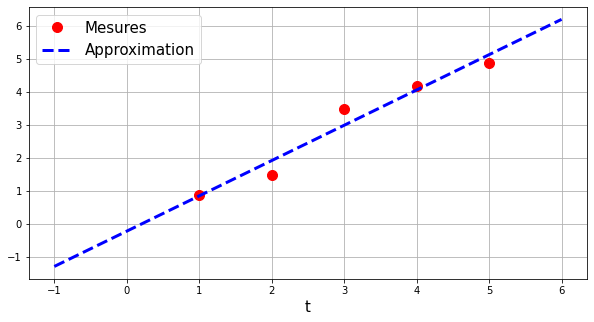

In [77]:
a = -1
b = 6
m = 100
plt.figure(figsize=(10,5))
t = np.linspace(a,b,100) # on pourra réduire le nombre de points et on prend que deux points seulement si on cherche une droite 
plt.plot(X,Y,'ro',t,PLSA(X,Y,1)(t),'b--',lw=3,markersize=10) 
plt.xlabel('t',fontsize=15)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.legend(('Mesures','Approximation'),fontsize=15, loc = 0) 
plt.grid(True)

# Présentation de la bibliothèque Pandas
Pandas est une bibliothèque Python pour l'analyse de données. Il propose un certain nombre d'opérations d'exploration, de nettoyage et de transformation des données qui sont essentielles pour travailler avec des données en Python. Pandas s'appuie sur  numpy et scipy  fournissant des structures de données et des fonctions de manipulation de données faciles à utiliser avec indexation intégrée.

Les principales structures de données fournies par pandas sont Series et  DataFrames. Les principales caractéristiques de pandas sont les suivantes:
* Génération de statistiques descriptives sur les données
* Nettoyage des données à l'aide des fonctions pandas intégrées
* Opérations de données fréquentes pour le sous-ensemble, le filtrage, l'insertion, la suppression et l'agrégation de données

**Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/

## Les structures de données en `pandas`
`Pandas` nous offre deux structures de données principales à savoir: la classe `Series` et la classe `DataFrame`.   

1. Une `Series` est un tableau à une dimension où chaque élément est indexé avec essentiellement un autre array (souvent de chaînes de caractères).
2. Un `DataFrame` est un tableau à deux dimensions où les lignes et les colonnes sont indexées.

# Application 1

##  Charger vos données dans une DataFrame Pandas
Les options les plus courantes :
- read_csv
- read_excel

In [78]:
# chargement de la bibliothèque pandas
import pandas as pd 

Importer l'ensemble de données avec read_csv

In [79]:
# Charger la base de données titatnic et l'affecter à la variable data
df = pd.read_csv('cons_veh.csv')

In [80]:
# Pour afficher le nombre de lignes et de colonnes
df.shape

(31, 4)

Vérification des premiers éléments de DataFrame avec la méthode .head ()

In [81]:
df.head() # la méthpde head() affiche les 5 premières lignes par defaut

,modele,prix,puissance,consommation
0,Daihatsu Cuore,11600,32,5.7
1,Suzuki Swift 1.0 GLS,12490,39,5.8
2,Fiat Panda Mambo L,10450,29,6.1
3,VW Polo 1.4 60,17140,44,6.5
4,Opel Corsa 1.2i Eco,14825,33,6.8


In [82]:
# head() affiche les 5 premières lignes. 
#Pour voir moins ou plusieurs lignes, passer un entier, par exemple: head(10)
df.head(10)

,modele,prix,puissance,consommation
0,Daihatsu Cuore,11600,32,5.7
1,Suzuki Swift 1.0 GLS,12490,39,5.8
2,Fiat Panda Mambo L,10450,29,6.1
3,VW Polo 1.4 60,17140,44,6.5
4,Opel Corsa 1.2i Eco,14825,33,6.8
5,Subaru Vivio 4WD,13730,32,6.8
6,Toyota Corolla,19490,55,7.1
7,Ferrari 456 GT,285000,325,21.3
8,Mercedes S 600,183900,300,18.7
9,Maserati Ghibli GT,92500,209,14.5


Vérification des derniers éléments de DataFrame avec la méthode .tail ()

In [83]:
# tail() affiche les 5 dernières lignes. 
#Pour voir moins ou plusieurs lignes, passer un entier, par exemple: tail(3)
df.tail(10)

,modele,prix,puissance,consommation
21,Hyundai Sonata 3000,38990,107,11.7
22,Lancia K 3.0 LS,50800,150,11.9
23,Mazda Hachtback V,36200,122,10.8
24,Mitsubishi Galant,31990,66,7.6
25,Opel Omega 2.5i V6,47700,125,11.3
26,Peugeot 806 2.0,36950,89,10.8
27,Nissan Primera 2.0,26950,92,9.2
28,Seat Alhambra 2.0,36400,85,11.6
29,Toyota Previa salon,50900,97,12.8
30,Volvo 960 Kombi aut,49300,125,12.7


In [84]:
# afficher les noms de colonnes 
df.columns

Index(['modele', 'prix', 'puissance', 'consommation'], dtype='object')

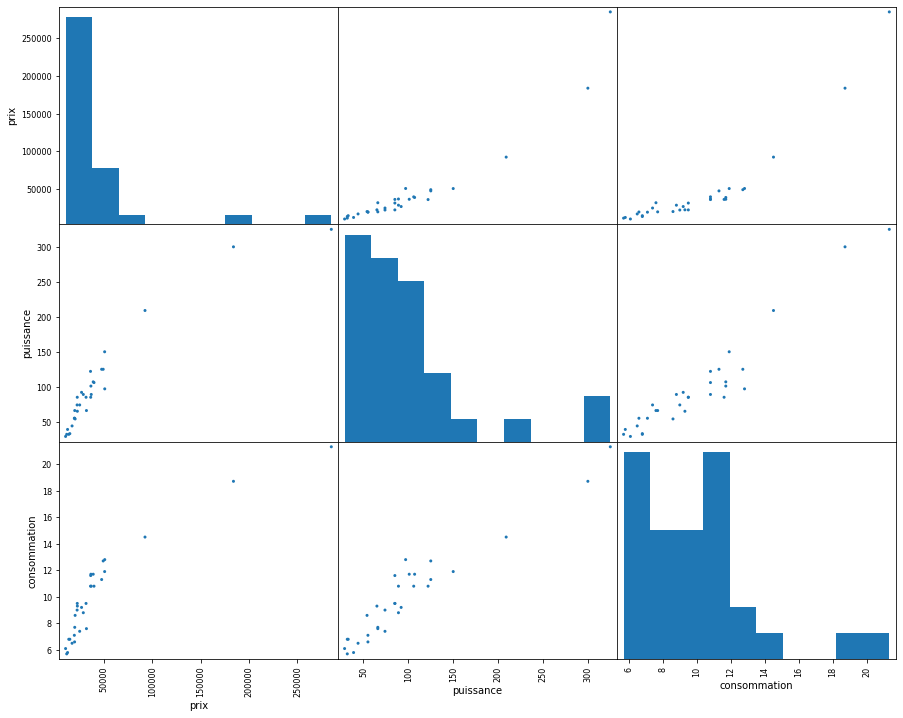

In [85]:
pd.plotting.scatter_matrix(df,alpha=1, figsize=(15,12));

**Exercice**

- Créer une variable `puiss` qui contient les valeurs numérique de la colonne `puissance`en utilisant la commande `values`. Quel est le type de cette variable?.





In [86]:
puiss = df['puissance'].values
type(puiss)
np.shape(puiss)


(31,)

- Transformer le vecteur obtenue en un vecteur colonne en utilisant la commande `reshape(-1,1)`.

In [87]:
#puiss.reshape(-1,1)

**Exrcice**

Représenter l'évolution des valeurs de la variable consommation en fonction de la variable puissance.

Représenter le modéle polynomial d'ordre p (p$\in \{1,2,3\}$) de la régression au sens des moindres carrés de la variable consommation en fonction de la variable puissance

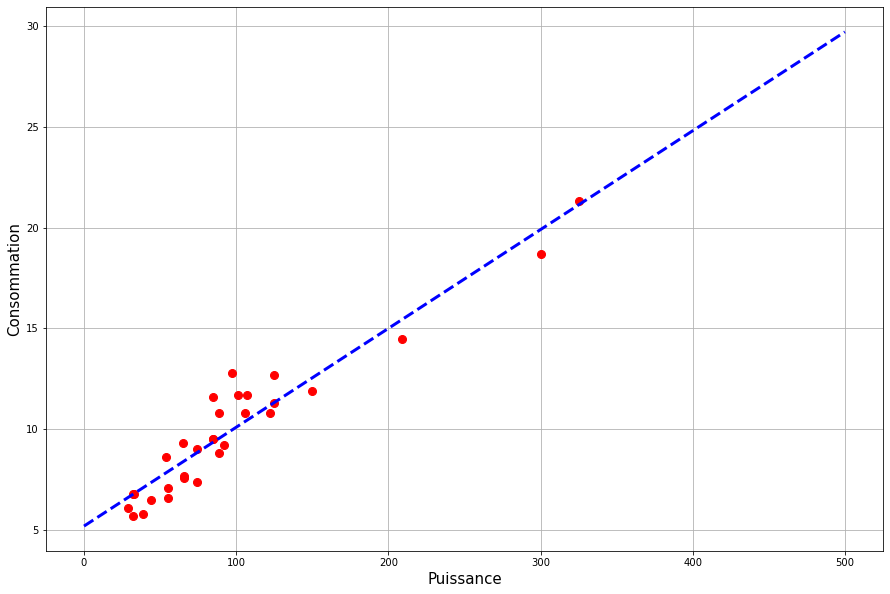

In [88]:
puiss = df['puissance'].values
puiss = puiss.reshape(-1,1)
conso = df['consommation'].values
conso = conso.reshape(-1,1)
plt.figure(figsize=(15,10))
t = np.linspace(0,500,400) # on pourra réduire le nombre de points et on prend que deux points seulement si on cherche une droite 
plt.plot(puiss,conso,'ro',t,PLSA(puiss,conso,1)(t),'b--', lw=3,markersize=8)
plt.ylabel('Consommation',fontsize=15)
plt.xlabel('Puissance',fontsize=15)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.grid(True)

###  Exercice (Asynchrone)

Représenter l'évolution des valeurs de la variable consommation en fonction de la variable prix.

Représenter le modéle polynomial d'ordre p (p$\in \{1,2,3\}$) de la régression au sens des moindres carrés de la variable consommation en fonction de la variable prix.

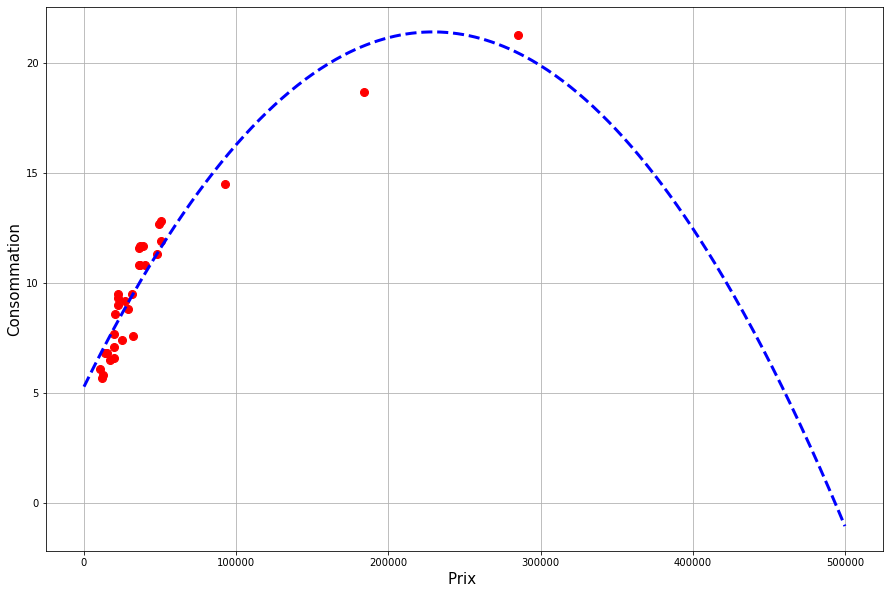

In [89]:
prix = df['prix'].values.reshape(-1,1)
conso = df['consommation'].values.reshape(-1,1)
plt.figure(figsize=(15,10))
t = np.linspace(0,500000,400) # on pourra réduire le nombre de points et on prend que deux points seulement si on cherche une droite 
plt.plot(prix,conso,'ro',t,PLSA(prix,conso,2)(t),'b--', lw=3,markersize=8)
plt.ylabel('Consommation',fontsize=15)
plt.xlabel('Prix ',fontsize=15)
plt.grid(True)

# Références  
[1] [Kiusalaas, J. (2013). Numerical methods in engineering with Python 3. Cambridge university press.](https://books.google.tn/books?hl=fr&lr=&id=YlkgAwAAQBAJ&oi=fnd&pg=PP10&dq=numerical+methods+in+engineering+&ots=-42y60OrWf&sig=wxL2oISNUKKPlvgH4-tsYh1RK9o&redir_esc=y#v=onepage&q=numerical%20methods%20in%20engineering&f=false)  
[2] [Numpy Package](https://numpy.org/devdocs/user/quickstart.html)  
[3] [Mathplotlib Package](https://matplotlib.org/tutorials/index.html#introductory)  
[4] [Jupyter markdowns](http://faccanoni.univ-tln.fr/user/enseignements/20182019/M62-CM1.pdf)

[5] [Kiusalaas, J. (2013). Numerical methods in engineering with Python 3. Cambridge university press.](https://books.google.tn/books?hl=fr&lr=&id=YlkgAwAAQBAJ&oi=fnd&pg=PP10&dq=numerical+methods+in+engineering+&ots=-42y60OrWf&sig=wxL2oISNUKKPlvgH4-tsYh1RK9o&redir_esc=y#v=onepage&q=numerical%20methods%20in%20engineering&f=false)  
[6] [Numpy Package](https://numpy.org/devdocs/user/quickstart.html)  
[7] [Mathplotlib Package](https://matplotlib.org/tutorials/index.html#introductory)  
[8] [Jupyter markdowns](http://faccanoni.univ-tln.fr/user/enseignements/20182019/M62-CM1.pdf)  
[9] [Pandas Package](https://pandas.pydata.org/pandas-docs/stable/?v=20191015224639)